In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_data = pd.read_csv("../raw_data/protein_solubility/processed_data_to_train.csv")
df_data.head(5)

,sequence,response,length,is_in_selected
0,MLYSLVKKYLFSLDAEIAHEKVCQILRTLSSSPFLCRLIHSQWGYK...,97.0,351,1
1,MTILNHTLGFPRVGLRRELKKAQESYWAGNSTREELLAVGRELRAR...,100.0,753,1
2,MSKFSFTIHSNYKKARSGVITTAHGKIRTPTFMPVGTRGTVKAMLT...,57.0,361,1
3,MKRAVVVFSGGQDSTTCLIQALHQYDEVHCVTFDYGQRHRAEIDVA...,99.0,231,1
4,MSEIVTYEDALKDFEPIIGLEVHVELSTQTKLFSSAPNIAGPLASC...,86.0,504,1


In [3]:
df_data = df_data[["sequence", "response"]]
df_data.head()

,sequence,response
0,MLYSLVKKYLFSLDAEIAHEKVCQILRTLSSSPFLCRLIHSQWGYK...,97.0
1,MTILNHTLGFPRVGLRRELKKAQESYWAGNSTREELLAVGRELRAR...,100.0
2,MSKFSFTIHSNYKKARSGVITTAHGKIRTPTFMPVGTRGTVKAMLT...,57.0
3,MKRAVVVFSGGQDSTTCLIQALHQYDEVHCVTFDYGQRHRAEIDVA...,99.0
4,MSEIVTYEDALKDFEPIIGLEVHVELSTQTKLFSSAPNIAGPLASC...,86.0


<Axes: xlabel='response', ylabel='Count'>

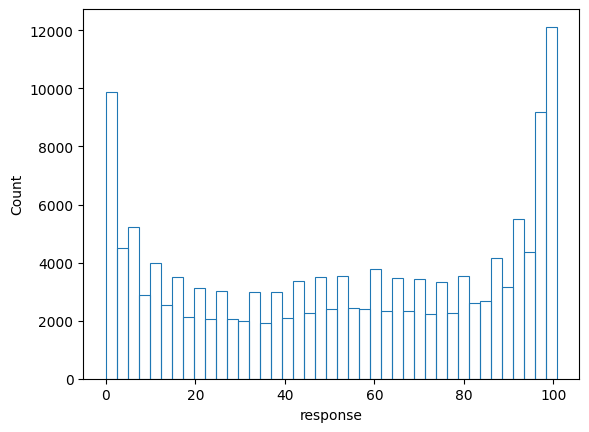

In [4]:
sns.histplot(data=df_data, x="response", fill=False)

In [5]:
train_data, test_data = train_test_split(df_data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [6]:
train_data["source"] = "Train"
test_data["source"] = "Test"
val_data["source"] = "Validation"

full_data = pd.concat([train_data, test_data, val_data], axis=0)

<Axes: xlabel='response', ylabel='Count'>

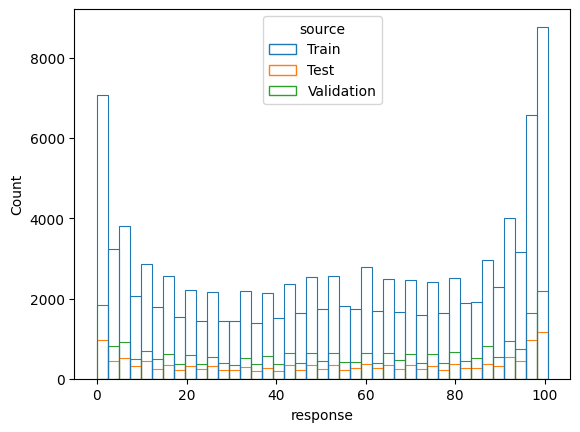

In [7]:
sns.histplot(data=full_data, x="response", hue="source", fill=False)

In [8]:
train_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/train_data.csv", index=False)
val_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/val_data.csv", index=False)
test_data[["sequence", "response"]].to_csv("../raw_data/protein_solubility/test_data.csv", index=False)
